In [157]:
import pandas as pd
import os
print(os.environ['IEX_TOKEN'])

pk_2f841cbff2d6422ab0145ada59fa5d34


In [158]:
df = pd.DataFrame([10,20,30,40], columns=['numbers'], index=['a', 'b', 'c', 'd'])

In [159]:
df

,numbers
a,10
b,20
c,30
d,40


In [160]:
# Cell selection reverse of RC cola - Column then Row by label
df['numbers']['b']

20

In [161]:
# get rows
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [162]:
# get columns
df.columns

Index(['numbers'], dtype='object')

In [163]:
# lookup by row id
df.loc['c']

numbers    30
Name: c, dtype: int64

In [164]:
df.iloc[1:3] # lookup by row index inclusive to exclusive

,numbers
b,20
c,30


In [165]:
df.loc[['a', 'd']] # multi-lookup single row

,numbers
a,10
d,40


In [166]:
df.sum() # sum per column

numbers    100
dtype: int64

In [167]:
df['numbers'].apply(lambda x : x**2) # lambda function on all members of column

a     100
b     400
c     900
d    1600
Name: numbers, dtype: int64

In [168]:
df ** 2 # same on whole df

,numbers
a,100
b,400
c,900
d,1600


In [169]:
# Adding a column - provide a tuple
df['floats'] = (1.5, 2.5, 3.5, 4.5)
df

,numbers,floats
a,10,1.50
b,20,2.50
c,30,3.50
d,40,4.50


In [170]:
# add a column by adding a dataframe, specifying index mapping
df['names'] = pd.DataFrame(['Yves', 'Sandra', 'Lilli', 'Henry'], index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.50,Sandra
b,20,2.50,Lilli
c,30,3.50,Henry
d,40,4.50,Yves


In [171]:
# When appending, always include the index, or you lose all indices
df = df.append(pd.DataFrame({'numbers': 50, 'floats': 5.2, 'names': 'Mork'}, index=['y',]))
df

,numbers,floats,names
a,10,1.50,Sandra
b,20,2.50,Lilli
c,30,3.50,Henry
d,40,4.50,Yves
y,50,5.20,Mork


In [172]:
# Mean of specified columns - ignoring NaN
df[['numbers']].mean()

numbers   30.00
dtype: float64

In [173]:
df[['numbers', 'floats']].std()

numbers   15.81
floats     1.49
dtype: float64

In [174]:
import numpy as np

In [175]:
np.random.seed(100)

In [176]:
a = np.random.standard_normal((9,4)) # standard normal - mean 0, std 1
a

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

In [177]:
# now make it a DataFrame
df = pd.DataFrame(a)
df

,0,1,2,3
0,-1.75,0.34,1.15,-0.25
1,0.98,0.51,0.22,-1.07
2,-0.19,0.26,-0.46,0.44
3,-0.58,0.82,0.67,-0.10
4,-0.53,1.03,-0.44,-1.12
5,1.62,1.54,-0.25,-0.84
6,0.18,0.94,0.73,1.36
7,-0.33,0.06,0.22,-1.44
8,-0.76,0.82,0.75,-0.46


In [178]:
# Assign columns after df creation
df.columns = ['No. 1', 'No. 2', 'No. 3', 'No. 4']
df

,No. 1,No. 2,No. 3,No. 4
0,-1.75,0.34,1.15,-0.25
1,0.98,0.51,0.22,-1.07
2,-0.19,0.26,-0.46,0.44
3,-0.58,0.82,0.67,-0.10
4,-0.53,1.03,-0.44,-1.12
5,1.62,1.54,-0.25,-0.84
6,0.18,0.94,0.73,1.36
7,-0.33,0.06,0.22,-1.44
8,-0.76,0.82,0.75,-0.46


In [179]:
df['No. 2'].mean() # Run moments per column

0.701033094145646

In [180]:
# Create a time series
dates = pd.date_range('2019-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30'],
              dtype='datetime64[ns]', freq='M')

In [181]:
df.index = dates
df # instant time series indexed series

,No. 1,No. 2,No. 3,No. 4
2019-01-31,-1.75,0.34,1.15,-0.25
2019-02-28,0.98,0.51,0.22,-1.07
2019-03-31,-0.19,0.26,-0.46,0.44
2019-04-30,-0.58,0.82,0.67,-0.10
2019-05-31,-0.53,1.03,-0.44,-1.12
2019-06-30,1.62,1.54,-0.25,-0.84
2019-07-31,0.18,0.94,0.73,1.36
2019-08-31,-0.33,0.06,0.22,-1.44
2019-09-30,-0.76,0.82,0.75,-0.46


In [182]:
# Basic datatypes and Moments
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2019-01-31 to 2019-09-30
Freq: M
Data columns (total 4 columns):
No. 1    9 non-null float64
No. 2    9 non-null float64
No. 3    9 non-null float64
No. 4    9 non-null float64
dtypes: float64(4)
memory usage: 360.0 bytes


In [183]:
df.describe()

,No. 1,No. 2,No. 3,No. 4
count,9.00,9.00,9.00,9.00
mean,-0.15,0.70,0.29,-0.39
std,0.99,0.46,0.58,0.88
min,-1.75,0.06,-0.46,-1.44
25%,-0.58,0.34,-0.25,-1.07
50%,-0.33,0.82,0.22,-0.46
75%,0.18,0.94,0.73,-0.10
max,1.62,1.54,1.15,1.36


In [184]:
# Additionally, you can do these stats column-wise or row-wise
df.sum()

No. 1   -1.35
No. 2    6.31
No. 3    2.60
No. 4   -3.49
dtype: float64

In [185]:
df.mean()

No. 1   -0.15
No. 2    0.70
No. 3    0.29
No. 4   -0.39
dtype: float64

In [186]:
df.mean(axis=0) # column-wise

No. 1   -0.15
No. 2    0.70
No. 3    0.29
No. 4   -0.39
dtype: float64

In [187]:
df.mean(axis=1) # row-wise

2019-01-31   -0.13
2019-02-28    0.16
2019-03-31    0.01
2019-04-30    0.20
2019-05-31   -0.26
2019-06-30    0.52
2019-07-31    0.80
2019-08-31   -0.37
2019-09-30    0.09
Freq: M, dtype: float64

In [204]:
# Finance data time
from datetime import datetime
from iexfinance.stocks import get_historical_data

start = datetime(2019, 1, 1)
end = datetime(2019, 6, 15)
pd.options.display.float_format = '{:,.2f}'.format
df = pd.DataFrame(get_historical_data("AAPL", start, end, close_only=True)).transpose()

In [189]:
df.mean(axis=0)

close           181.12
volume   30,380,586.43
dtype: float64

In [190]:
import numpy as np # numpy universal functions can be applied to DataFrames
np.log(df) # e^output = original

,close,volume
2019-01-02,5.06,17.43
2019-01-03,4.96,18.33
2019-01-04,5.00,17.89
2019-01-07,5.00,17.82
2019-01-08,5.02,17.53
2019-01-09,5.03,17.62
2019-01-10,5.04,17.39
2019-01-11,5.03,17.11
2019-01-14,5.01,17.29
2019-01-15,5.03,17.17


In [191]:
# Let's visualize!
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

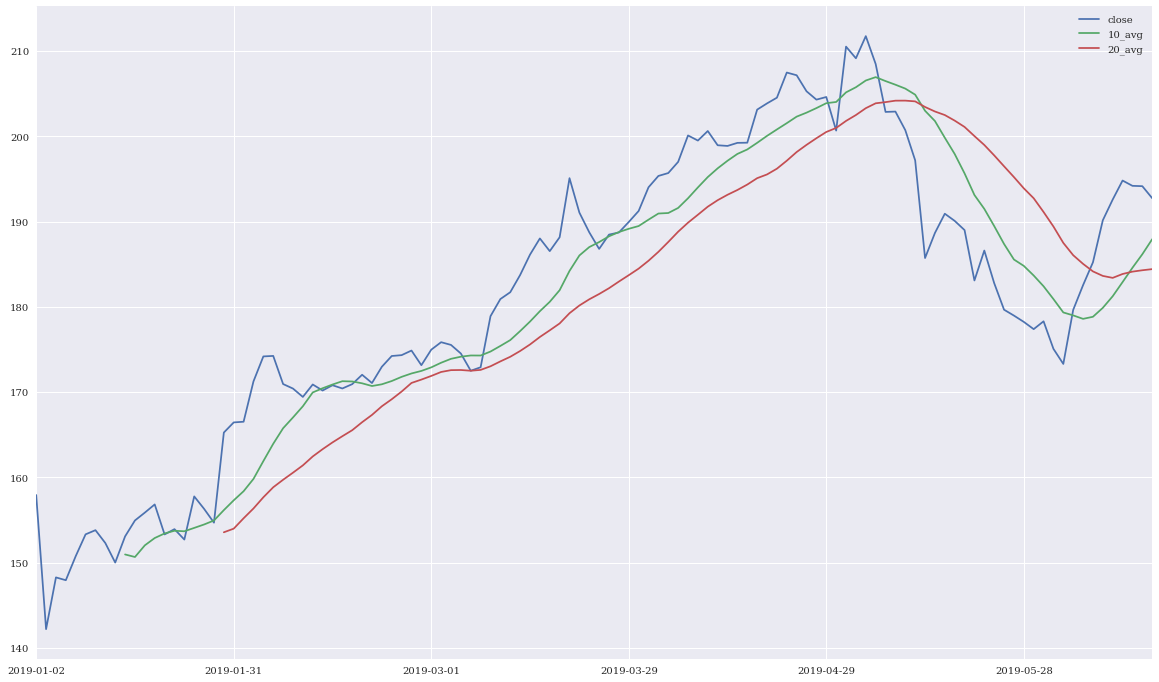

In [221]:
df['10_avg'] = df['close'].rolling(10).mean()
df['20_avg'] = df['close'].rolling(20).mean()
df['strat'] = np.where(df['close'] > df['10_avg'], 1, -1)
avg_plot = pd.DataFrame((df['close'], df['10_avg'], df['20_avg']))
avg_plot = avg_plot.transpose()
avg_plot.plot(figsize=(20,12))

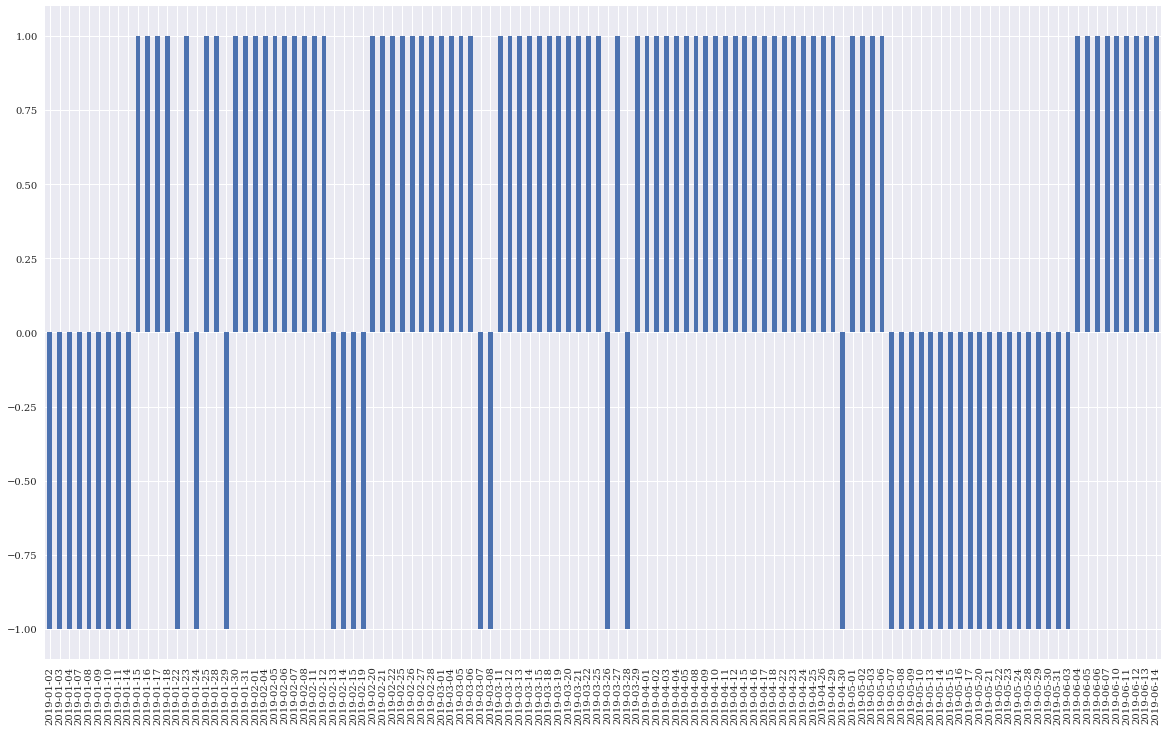

In [222]:
df['strat'].plot(kind='bar', figsize=(20,12))

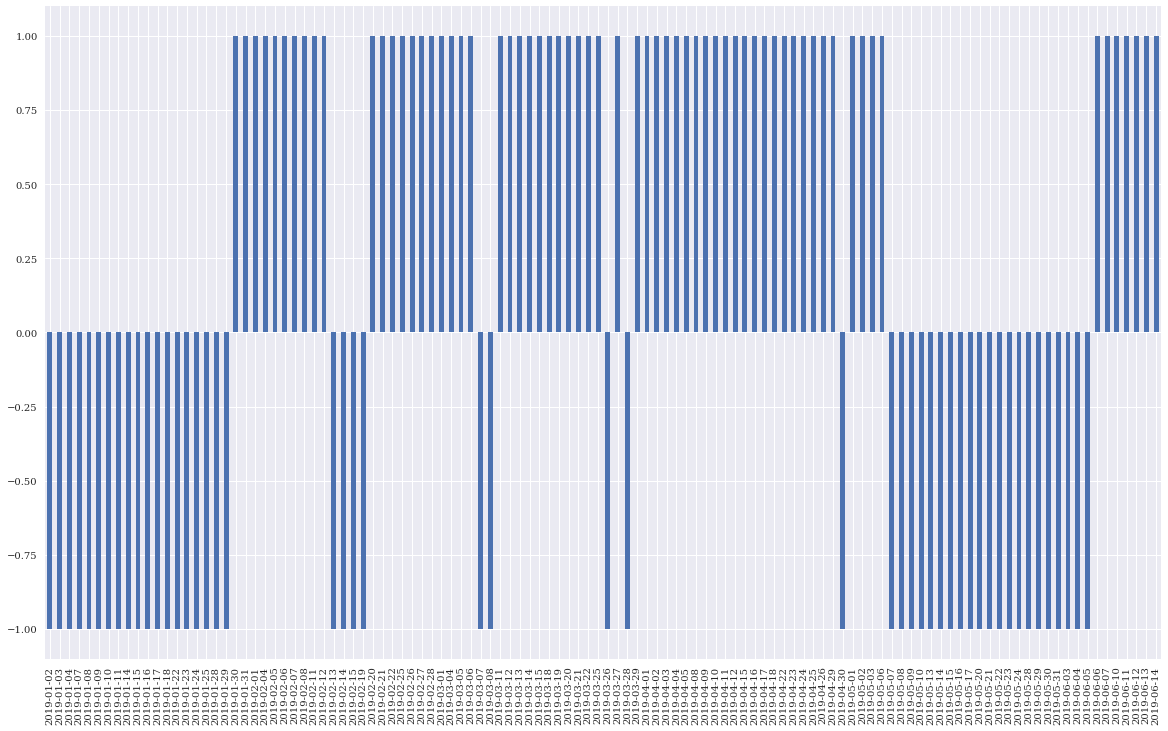

In [223]:
df['all_strat'] = np.where((df['close'] > df['10_avg']) & (df['close'] > df['20_avg']), 1, -1) # multi-condition where
df['all_strat'].plot(kind='bar', figsize=(20,12))

In [195]:
# Now for Series, it's a vector
S = pd.Series(np.linspace(0, 15, 7), name='series')
S

0    0.00
1    2.50
2    5.00
3    7.50
4   10.00
5   12.50
6   15.00
Name: series, dtype: float64

In [196]:
series_df = pd.DataFrame()
series_df['No1'] = S # Assign a Series onto a DataFrame
series_df

,No1
0,0.00
1,2.50
2,5.00
3,7.50
4,10.00
5,12.50
6,15.00


In [197]:
directional_group = df.groupby('strat') # examine other factors influencing or strengthening current strat
directional_group.size() # more short than long

strat
-1    74
 1    40
dtype: int64

In [198]:
directional_group.mean() 
# in general volume is a lot lower on short days than long days
# about USD10 difference in price between long and short

,close,volume,10_avg,20_avg
strat,,,,
-1,184.94,"27,828,772.46",180.44,180.49
1,174.06,"35,101,442.27",185.62,190.70


In [199]:
directional_group.max() # Interesting that short never swings more than 10 above the long

,close,volume,10_avg,20_avg
strat,,,,
-1,211.75,"64,827,328.00",206.94,203.87
1,202.90,"91,312,195.00",206.48,204.18


In [200]:
directional_group.aggregate([min, max])

close               volume               10_avg        20_avg       
         min    max           min           max    min    max    min    max
strat                                                                      
-1    153.07 211.75 17,070,211.00 64,827,328.00 150.65 206.94 153.55 203.87
 1    142.19 202.90 18,972,826.00 91,312,195.00 153.41 206.48 163.30 204.18

In [201]:
xy_data = np.random.standard_normal((10, 2))

In [202]:
xy_df = pd.DataFrame(xy_data, columns=('x', 'y'))
xy_df

,x,y
0,1.19,-1.69
1,-1.36,-1.23
2,-0.54,-0.67
3,0.01,-0.61
4,1.30,-1.73
5,-0.98,0.36
6,-1.61,1.47
7,-1.19,-0.55
8,-0.94,-0.83
9,0.11,0.51


In [203]:
xy_df['x'] > 0.3 # any logic operator can be applied on any column

0     True
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9    False
Name: x, dtype: bool

In [224]:
# Munging
df1 = pd.DataFrame(['100', '200', '300', '400'],
                  index=['a', 'b', 'c', 'd'],
                  columns=['A',])
df1

,A
a,100
b,200
c,300
d,400


In [226]:
df2 = pd.DataFrame(['200', '150', '50'],
                  index=['f', 'b', 'd'],
                  columns=['B',])
df2

,B
f,200
b,150
d,50


In [227]:
# outer join
df1.append(df2, sort=False)

,A,B
a,100,NaN
b,200,NaN
c,300,NaN
d,400,NaN
f,NaN,200
b,NaN,150
d,NaN,50


In [228]:
# get rid of indices for easy row select or to add new index
df1.append(df2, ignore_index=True, sort=False)

,A,B
0,100,NaN
1,200,NaN
2,300,NaN
3,400,NaN
4,NaN,200
5,NaN,150
6,NaN,50


In [231]:
# left join
df1.join(df2)

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [230]:
df2.join(df1)

,B,A
f,200,NaN
b,150,200
d,50,400


In [232]:
# Inner
df1.join(df2, how='inner')

,A,B
b,200,150
d,400,50


In [233]:
# Outer
df1.join(df2, how='outer')

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50
f,NaN,200
